<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Group_Number: 124
#### Student Name: Pankaj Shitole
#### Student ID: 33570523
#### Student Name: Sachin Shivaramaiah
#### Student ID: 34194037


Date: 30/08/2024


Environment: Google Colab

---




Libraries used:
* re (for regular expression, installed and imported)
* pandas (for data manipulation)
* datetime
* json
    
</div>

<div class="alert alert-block alert-warning">
    
## Introduction  <a class="anchor" name="libs"></a>
 </div>

<div class="alert alert-block alert-warning">
    
# Step 1 <a class="anchor" name="libs"></a>
 </div>

<div class="alert alert-block alert-warning">
    
## 1.2  Initial Library Installations and Drive Mounting Steps <a class="anchor" name="libs"></a>
 </div>

In [154]:
# !pip install pytz
# !pip install gzip

In [155]:
import os
import pandas as pd
import re
from datetime import datetime
import json
import pytz
import ast
import gzip
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
folder_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group124'

In [158]:
os.chdir(folder_path)

<div class="alert alert-block alert-warning">
    
## 1.3  Loading and Reading Excel and textfile for EDA <a class="anchor" name="libs"></a>
 </div>

In [159]:
def read_txt_files(file_path):
    with open(f'{folder_path}/{file_path}', 'r', encoding = 'utf-8') as f:    # Passed folder path and file path
        return f.read()

In [160]:
text_files = []
excel_file = []

for file in os.listdir():    # list all files in the directory
    if file.endswith('.txt'):    # Check the file which is ending with .txt
        text_files.append(read_txt_files(file))
    else:
      excel_dictionary = pd.read_excel(file, engine = 'openpyxl', sheet_name = None)    # Reading multiple sheets in an excel file
      # By default it is ready in dict() datatype
      # Converting it into list, since it's easy to parse and we are not required to store sheet names
      excel_file = list(excel_dictionary.values())

In [161]:
userid_pattern = r"(?i)<\s*user[_id.\s]*>\s*(.*?)\s*<\s*[/]*\s*user[_id.\s]*>"
gmapid_pattern = r"(?i)<\s*gmap[_\s]*id\s*>\s*(.*?)\s*<\s*/{1,2}\s*gmap[_\s]*id\s*>"
pics_pattern = r"(?i)<\s*(?:pics|pictures)\s*>\s*(.*?)\s*<\s*/{1,2}\s*(?:pics|pictures)\s*>"
review_pattern = r"(?i)<\s*(?:text|review)\s*>\s*(.*?)\s*<\s*/{1,2}\s*(?:text|review)\s*>"
rating_pattern = r"(?i)<\s*(?:rate|rating)\s*>\s*(.*?)\s*<\s*/{1,2}\s*(?:rate|rating)\s*>"
time_pattern = r"(?i)<\s*(?:time|date)\s*>\s*(.*?)\s*<\s*/{1,2}\s*(?:time|date)\s*>"
resp_pattern = r"(?i)<\s*(?:resp|response)\s*>\s*(.*?)\s*<\s*/{1,2}\s*(?:resp|response)\s*>"

In [162]:
patterns_list = [userid_pattern, resp_pattern, pics_pattern, review_pattern, rating_pattern, time_pattern, gmapid_pattern]
matches_count = []
for text in text_files:
  lst = []
  for patterns in patterns_list:
    matches = re.findall(patterns, text, re.DOTALL|re.IGNORECASE)
    lst.append(matches)
  matches_count.append(lst)


In [163]:
# Initialize empty lists to store all matches for each pattern
all_user_ids = []
all_responses = []
all_pictures = []
all_reviews = []
all_ratings = []
all_times = []
all_gmap_ids = []

# List to store references to the lists above for easier management
all_matches_lists = [all_user_ids, all_responses, all_pictures, all_reviews, all_ratings, all_times, all_gmap_ids]

# Iterate over each match list (for each text file)
for match_lst in matches_count:
    for i, matches in enumerate(match_lst):
        # Extend the corresponding list with the matches found in this file
        all_matches_lists[i].extend(matches)


In [164]:
# Combine the data into a structure suitable for DataFrame
data = list(zip(*all_matches_lists))

# Create DataFrame with appropriate column names
df_text = pd.DataFrame(data, columns=['user_id', 'response', 'pic', 'reviews', 'ratings', 'time', 'gmapid'])


In [165]:
#extracting the excel_data
col_names = ['user_id', 'resp', 'pics', 'text', 'rating', 'time', 'gmap_id']
filtered_sheets = [df[col_names] for df in excel_file]


In [166]:
#Concating all the filtered sheets into one sheet
df_excel = pd.concat(filtered_sheets, ignore_index=False)

In [167]:
#Preprocessing the mereged data
df_excel.dropna(axis=0, how="all", inplace=True)    # drop the nas if any

In [168]:
 # Rename the columns to make it consistent with the text files
df_excel.rename(columns={"resp": "response", "pics": "pic", "text": "reviews", "rating": "ratings", "gmap_id": "gmapid"}, inplace=True)

In [169]:
# Concatenate the text and excel data
df = pd.concat([df_excel, df_text], ignore_index= True)

In [170]:
# Drop the duplicates if any
df.drop_duplicates(inplace=True)

In [171]:
df['response'].fillna("None", inplace = True)

In [172]:
# Convert the 'time' column to numeric
df['time'] = pd.to_numeric(df['time'], errors='coerce')

In [173]:
def convert_timestamp_to_utc(timestamp_ms):
    # Convert milliseconds to seconds
    timestamp_s = timestamp_ms / 1000.0
    # Convert to datetime object in UTC
    dt_object = datetime.utcfromtimestamp(timestamp_s)
    # Format the datetime object to the desired format
    return dt_object.strftime('%Y-%m-%d %H:%M:%S')

In [174]:
df['time'] = df['time'].apply(convert_timestamp_to_utc)    # transform the time column in utc format

In [175]:
#Imputing None inplace of nan values
df["reviews"].fillna("None", inplace = True)

In [176]:
df

,user_id,response,pic,reviews,ratings,time,gmapid
0,101793931959565944658,None,NaN,"Gosh, can you like a place just because of how...",5.0,2021-02-03 07:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",[{'url': ['https://lh5.googleusercontent.com/p...,Great sandwiches and great service. Recommend!,5.0,2018-06-10 22:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8
2,104008070789102455926,None,NaN,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-16 00:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8
3,117302051837968062902,None,NaN,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-02 02:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8
4,101898624484349413298,None,NaN,Love for all the sammies. Really appreciate t...,5.0,2021-04-25 01:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8
...,...,...,...,...,...,...,...
40003,109527903977692502976,None,None,None,5,2020-08-28 17:54:43,0x808fa33b072bace5:0xd3341eec80d40259
40004,116470109907099438382,"{'time': 1617988455775, 'text': 'Thank you Mil...",None,None,5,2020-12-01 18:13:24,0x808fa33b072bace5:0xd3341eec80d40259
40005,104872366756536408248,None,None,None,5,2020-01-07 21:15:41,0x808fa33b072bace5:0xd3341eec80d40259
40006,106824303708774603559,"{'time': 1617986704266, 'text': 'Thank you Pau...",None,None,5,2021-01-21 17:42:15,0x808fa33b072bace5:0xd3341eec80d40259


<div class="alert alert-block alert-warning">
    
## 1.4 Tranforming Raw data columns into meaningful columns for EDA <a class="anchor" name="libs"></a>
 </div>

### 1.4.1 Converting timezone from UTC to PT
#### Converting the timezone into Pacific timezone since our EDA will be focusing on the interests of stakeholders who reside in California and the best way to convey time insgits would be to consider pacific time zone which helps stakeholders for planing or stratergies to start business clearly.

In [177]:
# Define the Pacific Time zone
pacific_zone = pytz.timezone('America/Los_Angeles')

# Function to convert UTC time to Pacific Time
def convert_time_to_pacific(time_str):
    try:
        utc_time = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        utc_time = utc_time.replace(tzinfo=pytz.utc)
        pacific_time = utc_time.astimezone(pacific_zone)
        return pacific_time.strftime('%Y-%m-%d %H:%M:%S')
    except ValueError:
        return None

# Apply the conversion to the 'time' column
df['time'] = df['time'].apply(convert_time_to_pacific)
df.head()  # Display the first few rows to verify the conversion

,user_id,response,pic,reviews,ratings,time,gmapid
0,101793931959565944658,None,NaN,"Gosh, can you like a place just because of how...",5.0,2021-02-02 23:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",[{'url': ['https://lh5.googleusercontent.com/p...,Great sandwiches and great service. Recommend!,5.0,2018-06-10 15:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8
2,104008070789102455926,None,NaN,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-15 17:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8
3,117302051837968062902,None,NaN,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-01 19:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8
4,101898624484349413298,None,NaN,Love for all the sammies. Really appreciate t...,5.0,2021-04-24 18:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8


### 1.4.2 Further transforming response column to extract time and response as 2 seperate entity
#### In the raw extracted df within the response column we have 2 subset of data that is response timestamp and the response text which are indeed 2 entites in nature and will be palced in seperate columns.

In [178]:
# Function to split the response into time and text, and convert the time to Pacific Time
def split_response(response):
    if pd.isna(response):
        return None, None
    try:
        response_dict = ast.literal_eval(response)
        if not isinstance(response_dict, dict):
            return None, None

        response_time = response_dict.get('time')
        response_text = response_dict.get('text')

        if response_time:
            utc_time = datetime.utcfromtimestamp(int(response_time) / 1000)
            pacific_time = utc_time.astimezone(pacific_zone)
            response_time = pacific_time.strftime('%Y-%m-%d %H:%M:%S')

        return response_time, response_text
    except (SyntaxError, ValueError, TypeError):
        return None, None


df['response_time'], df['response_text'] = zip(*df['response'].apply(split_response))

df.head()

,user_id,response,pic,reviews,ratings,time,gmapid,response_time,response_text
0,101793931959565944658,None,NaN,"Gosh, can you like a place just because of how...",5.0,2021-02-02 23:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",[{'url': ['https://lh5.googleusercontent.com/p...,Great sandwiches and great service. Recommend!,5.0,2018-06-10 15:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8,2018-06-14 14:28:32,Ricky Carmona Thanks for visiting us! Hope to ...
2,104008070789102455926,None,NaN,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-15 17:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None
3,117302051837968062902,None,NaN,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-01 19:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None
4,101898624484349413298,None,NaN,Love for all the sammies. Really appreciate t...,5.0,2021-04-24 18:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None


#### After spliting the response column we were more looking forward to a detailed analysis with respect to Year Month and Date and hence further sergated them into another 3 seperate column which will help us to capture hidden insights that are at micro level

In [179]:
# Function to split datetime into separate year, month, and day columns
def split_datetime(datetime_str):
    try:
        date_part, time_part = datetime_str.split(' ')
        year, month, day = date_part.split('-')
        return int(year), int(month), int(day), time_part
    except (ValueError, AttributeError):
        return None, None, None, None

# Apply the function to the 'response_time' and 'time' columns
df['response_year'], df['response_month'], df['response_day'], df['response_time_only'] = zip(*df['response_time'].apply(split_datetime))
df['review_year'], df['review_month'], df['review_day'], df['review_time_only'] = zip(*df['time'].apply(split_datetime))
df.head()  # Display the first few rows to verify the split

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,response,pic,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only
0,101793931959565944658,None,NaN,"Gosh, can you like a place just because of how...",5.0,2021-02-02 23:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,2,2,23:22:21
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",[{'url': ['https://lh5.googleusercontent.com/p...,Great sandwiches and great service. Recommend!,5.0,2018-06-10 15:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8,2018-06-14 14:28:32,Ricky Carmona Thanks for visiting us! Hope to ...,2018.0,6.0,14.0,14:28:32,2018,6,10,15:15:59
2,104008070789102455926,None,NaN,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-15 17:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,3,15,17:13:37
3,117302051837968062902,None,NaN,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-01 19:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,1,19:39:55
4,101898624484349413298,None,NaN,Love for all the sammies. Really appreciate t...,5.0,2021-04-24 18:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,24,18:00:48


#### We further pre-process the the pic column by repalcing the url text in respective rows with the count of it instead. This will help us to undertsand to get track on the number of photos posted by the users for a specific business.

In [180]:
# Function to count the number of photos posted
def count_photos(pic_data):
    if pd.isna(pic_data):
        return 0
    try:
        pic_list = ast.literal_eval(pic_data)
        if not isinstance(pic_list, list):
            return 0

        count = 0
        for item in pic_list:
            if isinstance(item, dict) and 'url' in item:
                count += len(item['url'])
        return count
    except (SyntaxError, ValueError, TypeError):
        return 0

df.rename(columns={'pic': 'number_of_photos_posted'}, inplace=True)
df['number_of_photos_posted'] = df['number_of_photos_posted'].apply(count_photos)

df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only
0,101793931959565944658,None,0,"Gosh, can you like a place just because of how...",5.0,2021-02-02 23:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,2,2,23:22:21
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",1,Great sandwiches and great service. Recommend!,5.0,2018-06-10 15:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8,2018-06-14 14:28:32,Ricky Carmona Thanks for visiting us! Hope to ...,2018.0,6.0,14.0,14:28:32,2018,6,10,15:15:59
2,104008070789102455926,None,0,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-15 17:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,3,15,17:13:37
3,117302051837968062902,None,0,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-01 19:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,1,19:39:55
4,101898624484349413298,None,0,Love for all the sammies. Really appreciate t...,5.0,2021-04-24 18:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,24,18:00:48


#### After we have generated a separate time column we will now try to map which part of the day these time belong which will help us to understand the traffic of the user response for a particualr business or business categories.

In [181]:
# Function to categorize the time into different periods of the day
def categorize_time_of_day(time_str):
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M:%S').time()
        if time_obj >= pd.to_datetime('00:00:00').time() and time_obj < pd.to_datetime('01:00:00').time():
            return 'Midnight: 00:00 to 01:00'
        elif time_obj >= pd.to_datetime('01:00:00').time() and time_obj < pd.to_datetime('05:00:00').time():
            return 'Overnight: 01:00 to 05:00'
        elif time_obj >= pd.to_datetime('05:00:00').time() and time_obj < pd.to_datetime('08:00:00').time():
            return 'Early Morning: 05:00 to 08:00'
        elif time_obj >= pd.to_datetime('08:00:00').time() and time_obj < pd.to_datetime('12:00:00').time():
            return 'Mid Morning: 08:00 to 12:00'
        elif time_obj >= pd.to_datetime('12:00:00').time() and time_obj < pd.to_datetime('17:00:00').time():
            return 'Afternoon: 12:00 to 17:00'
        elif time_obj >= pd.to_datetime('17:00:00').time() and time_obj < pd.to_datetime('21:00:00').time():
            return 'Evening: 17:00 to 21:00'
        elif time_obj >= pd.to_datetime('21:00:00').time() and time_obj <= pd.to_datetime('23:59:59').time():
            return 'Late Night: 21:00 to 00:00'
        else:
            return 'Unknown'
    except Exception:
        return 'Unknown'

# Apply the categorization function to 'review_time_only'
df['description_day'] = df['review_time_only'].apply(categorize_time_of_day)
df.head()  # Display the first few rows to verify the categorization

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only,description_day
0,101793931959565944658,None,0,"Gosh, can you like a place just because of how...",5.0,2021-02-02 23:22:21,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,2,2,23:22:21,Late Night: 21:00 to 00:00
1,104775924903315303964,"{'time': 1529011712830, 'text': 'Ricky Carmona...",1,Great sandwiches and great service. Recommend!,5.0,2018-06-10 15:15:59,0x809ade2768d0183d:0xf69bd2ae7fe733a8,2018-06-14 14:28:32,Ricky Carmona Thanks for visiting us! Hope to ...,2018.0,6.0,14.0,14:28:32,2018,6,10,15:15:59,Afternoon: 12:00 to 17:00
2,104008070789102455926,None,0,I ordered pepper jack melt with pastrami. The ...,1.0,2021-03-15 17:13:37,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,3,15,17:13:37,Evening: 17:00 to 21:00
3,117302051837968062902,None,0,Kayla is a girl that makes my sandwiches but s...,5.0,2021-04-01 19:39:55,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,1,19:39:55,Evening: 17:00 to 21:00
4,101898624484349413298,None,0,Love for all the sammies. Really appreciate t...,5.0,2021-04-24 18:00:48,0x809ade2768d0183d:0xf69bd2ae7fe733a8,None,None,NaN,NaN,NaN,None,2021,4,24,18:00:48,Evening: 17:00 to 21:00


#### Another preprocessing task, here we are mapping respective numbers to their month which will help us explore the data monthwise.

In [182]:
# Map month numbers to month names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
month_order = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Apply month mapping and sorting
df['review_month'] = df['review_month'].map(month_mapping)
df['review_month_order'] = df['review_month'].map(month_order)
df.sort_values(by=['gmapid', 'review_year', 'review_month_order', 'review_day', 'response_year', 'response_month', 'response_day'], inplace=True)
df.drop(columns=['review_month_order'], inplace=True)
df.head()  # Display the first few rows to verify the mapping and sorting

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only,description_day
36749,111713347260096365103,None,0,Brother in law joe...,5,2017-05-10 17:05:19,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,NaN,NaN,NaN,None,2017,May,10,17:05:19,Evening: 17:00 to 21:00
36728,103991040530406884797,None,0,Best place to stop for gas it has the lowest p...,5,2017-06-11 12:44:53,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,NaN,NaN,NaN,None,2017,June,11,12:44:53,Afternoon: 12:00 to 17:00
36748,100956652924318492061,None,0,Cheapest place to get gas and very clean insid...,5,2017-07-21 11:35:15,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,NaN,NaN,NaN,None,2017,July,21,11:35:15,Mid Morning: 08:00 to 12:00
36778,110231018317835831758,None,0,None,4,2017-08-03 22:15:18,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,NaN,NaN,NaN,None,2017,August,3,22:15:18,Late Night: 21:00 to 00:00
36757,110157039523937502672,None,0,None,4,2017-08-20 19:14:27,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,NaN,NaN,NaN,None,2017,August,20,19:14:27,Evening: 17:00 to 21:00


#### After a quick verification of the data we check for possible missing values. From the below graph on missing values we can clearly see 30k+ missing values with columns related to response, apart from response time all the other columns are relative to response and are categorical and hence filling up these missing values can be a considerble challenge since prediction of response is complex and hence we will not considering these columns for EDA.

In [183]:
# Get the number of rows
row_count = len(df)

print(f"Number of records/rows: {row_count}")

Number of records/rows: 39303


<ipython-input-184-e2d2a10dc2ba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


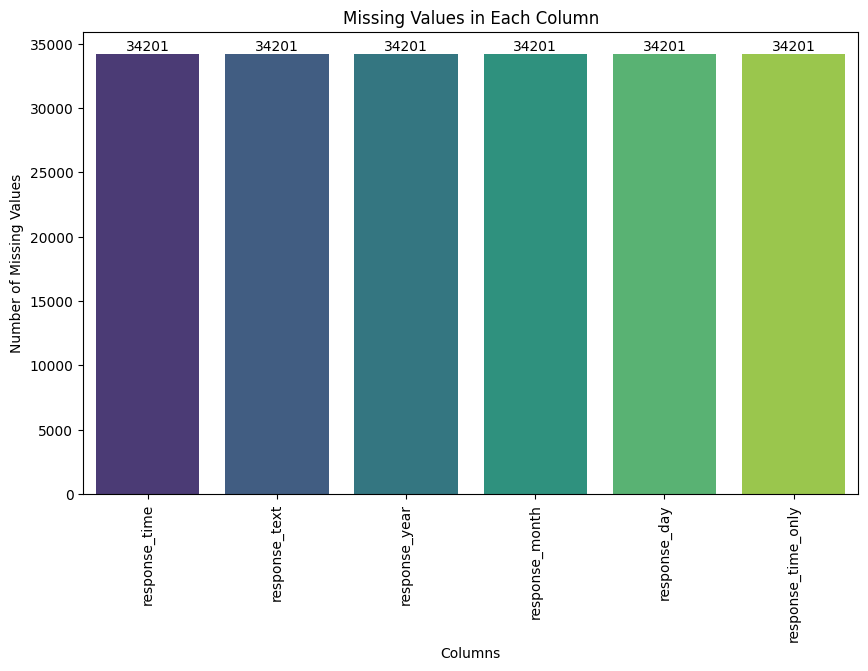

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

# Adding the count on top of each bar
for index, value in enumerate(missing_values.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Now we get a quick summary to understand a columns class and type which will help us to plan better for our EDA.

In [185]:
# Get basic information about the dataset
print("\nBasic Information about the Dataset:")
df_info = df.info()

for column in df.columns:
    print(f"Column: {column}, Type: {type(df[column].iloc[0])}")


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 39303 entries, 36749 to 21166
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  39303 non-null  object 
 1   response                 39303 non-null  object 
 2   number_of_photos_posted  39303 non-null  int64  
 3   reviews                  39303 non-null  object 
 4   ratings                  39303 non-null  object 
 5   time                     39303 non-null  object 
 6   gmapid                   39303 non-null  object 
 7   response_time            5102 non-null   object 
 8   response_text            5102 non-null   object 
 9   response_year            5102 non-null   float64
 10  response_month           5102 non-null   float64
 11  response_day             5102 non-null   float64
 12  response_time_only       5102 non-null   object 
 13  review_year              39303 non-null

#### We make a quick conversion of column type making sure respective columns are in string, int, float, and date time data types.

In [186]:
from datetime import time
# Convert the specified columns to object type (string)
df['review_year'] = df['review_year'].astype(str)
df['response_year'] = df['response_year'].astype(str)
df['response_month'] = df['response_month'].astype(str)
df['response_day'] = pd.to_numeric(df['response_day'], errors='coerce').fillna(0).astype(int)
# Convert 'review_time_only' to datetime.time objects while handling NaT values
df['review_time_only'] = pd.to_datetime(df['review_time_only'], format='%H:%M:%S', errors='coerce').dt.time
# Convert 'review_time_only' to datetime.time objects while handling NaT values
df['review_time_only'] = pd.to_datetime(df['review_time_only'], format='%H:%M:%S', errors='coerce').dt.time

# Fill NaT values in 'response_time_only' with a default time (e.g., 00:00:00)
df['response_time_only'] = df['response_time_only'].fillna(time(0, 0, 0))

# Convert 'response_time_only' to datetime.time objects while handling NaT values
df['response_time_only'] = pd.to_datetime(df['response_time_only'], format='%H:%M:%S', errors='coerce').dt.time
# Convert the 'response_text' column to string type
df['response_text'] = df['response_text'].astype(str)

df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39303 entries, 36749 to 21166
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  39303 non-null  object
 1   response                 39303 non-null  object
 2   number_of_photos_posted  39303 non-null  int64 
 3   reviews                  39303 non-null  object
 4   ratings                  39303 non-null  object
 5   time                     39303 non-null  object
 6   gmapid                   39303 non-null  object
 7   response_time            5102 non-null   object
 8   response_text            39303 non-null  object
 9   response_year            39303 non-null  object
 10  response_month           39303 non-null  object
 11  response_day             39303 non-null  int64 
 12  response_time_only       39303 non-null  object
 13  review_year              39303 non-null  object
 14  review_month             39303 non-null

In [187]:
# Loop through each column and print the type of the first element
for column in df.columns:
    print(f"Column: {column}, Type: {type(df[column].iloc[0])}")

Column: user_id, Type: <class 'str'>
Column: response, Type: <class 'str'>
Column: number_of_photos_posted, Type: <class 'numpy.int64'>
Column: reviews, Type: <class 'str'>
Column: ratings, Type: <class 'str'>
Column: time, Type: <class 'str'>
Column: gmapid, Type: <class 'str'>
Column: response_time, Type: <class 'NoneType'>
Column: response_text, Type: <class 'str'>
Column: response_year, Type: <class 'str'>
Column: response_month, Type: <class 'str'>
Column: response_day, Type: <class 'numpy.int64'>
Column: response_time_only, Type: <class 'datetime.time'>
Column: review_year, Type: <class 'str'>
Column: review_month, Type: <class 'str'>
Column: review_day, Type: <class 'numpy.int64'>
Column: review_time_only, Type: <class 'datetime.time'>
Column: description_day, Type: <class 'str'>


#### From this step since majority of the column are categorical we will try to check the range of values present in it just to make sure the values that are present are known values. And we will be repalcing balnks with the value 'None'

In [188]:
# List of columns to check for unique values
columns_to_check = [
    'response_year',
    'response_month',
    'response_day',
    'review_year',
    'review_month',
    'description_day',
    'review_day'
]

# Loop through each column and print the unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Add a blank line for better readability

Unique values in 'response_year':
['nan' '2018.0' '2019.0' '2020.0' '2021.0' '2017.0' '2016.0' '2013.0'
 '2015.0' '2014.0']

Unique values in 'response_month':
['nan' '1.0' '4.0' '12.0' '9.0' '8.0' '7.0' '6.0' '10.0' '11.0' '2.0'
 '3.0' '5.0']

Unique values in 'response_day':
[ 0 23 24 31 10 12  5 11 15 21 25  1 28  3  9 16 20 14 30 18 26 27  4  6
  7 17 29 19  8 22 13  2]

Unique values in 'review_year':
['2017' '2018' '2019' '2020' '2021' '2011' '2012' '2014' '2015' '2016'
 '2013' '2010' '2009']

Unique values in 'review_month':
['May' 'June' 'July' 'August' 'September' 'October' 'November' 'December'
 'January' 'February' 'March' 'April']

Unique values in 'description_day':
['Evening: 17:00 to 21:00' 'Afternoon: 12:00 to 17:00'
 'Mid Morning: 08:00 to 12:00' 'Late Night: 21:00 to 00:00'
 'Overnight: 01:00 to 05:00' 'Early Morning: 05:00 to 08:00'
 'Midnight: 00:00 to 01:00']

Unique values in 'review_day':
[10 11 21  3 20 25  1  2 27 30  9 12 13 15 17  4 16  8 24  7 31 28 29 23
  

In [189]:
import pandas as pd
import numpy as np


# Function to safely convert to int, handling NaN and None
def safe_convert(value):
    try:
        return int(float(value))
    except (ValueError, TypeError):
        return None

# Apply the function to 'response_year' and 'response_month'
df['response_year'] = df['response_year'].apply(safe_convert)
df['response_month'] = df['response_month'].apply(safe_convert)

# Replace NaN with None
df['response_year'].replace({np.nan: None}, inplace=True)
df['response_month'].replace({np.nan: None}, inplace=True)

df


,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only,description_day
36749,111713347260096365103,None,0,Brother in law joe...,5,2017-05-10 17:05:19,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,May,10,17:05:19,Evening: 17:00 to 21:00
36728,103991040530406884797,None,0,Best place to stop for gas it has the lowest p...,5,2017-06-11 12:44:53,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,June,11,12:44:53,Afternoon: 12:00 to 17:00
36748,100956652924318492061,None,0,Cheapest place to get gas and very clean insid...,5,2017-07-21 11:35:15,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,July,21,11:35:15,Mid Morning: 08:00 to 12:00
36778,110231018317835831758,None,0,None,4,2017-08-03 22:15:18,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,August,3,22:15:18,Late Night: 21:00 to 00:00
36757,110157039523937502672,None,0,None,4,2017-08-20 19:14:27,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,August,20,19:14:27,Evening: 17:00 to 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21189,104992852213729433252,None,0,Good customer service,4,2020-03-13 15:53:28,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,March,13,15:53:28,Afternoon: 12:00 to 17:00
21252,114648899531474251683,None,0,None,5,2020-07-03 18:44:12,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,July,3,18:44:12,Evening: 17:00 to 21:00
21286,103882384136292601541,None,0,None,3,2020-07-14 12:41:11,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,July,14,12:41:11,Afternoon: 12:00 to 17:00
21164,103635121013456314533,None,0,Review of an online purchase:\n\nEditing to ad...,2,2020-09-29 13:11:51,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,September,29,13:11:51,Afternoon: 12:00 to 17:00


In [190]:
# Create a mapping dictionary for month numbers to month names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

# Function to map the month number to the month name, leaving None as is
def map_month(month):
    if month is None:
        return None
    else:
        return month_mapping.get(month)

# Apply the function to the 'response_month' column
df['response_month'] = df['response_month'].apply(map_month)

# Verify the changes
print(f"Unique values in 'response_month' after mapping:")
print(df['response_month'].unique())

Unique values in 'response_month' after mapping:
[None 'January' 'April' 'December' 'September' 'August' 'July' 'June'
 'October' 'November' 'February' 'March' 'May']


In [191]:
columns_to_check = [
    'response_year',
    'response_month',
    'response_day',
    'review_year',
    'review_month',
    'review_day'
]

# Loop through each column and print the unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Add a blank line for better readability
df['response_year'].replace({np.nan: None}, inplace=True)
df['response_month'].replace({np.nan: None}, inplace=True)

df

Unique values in 'response_year':
[None 2018.0 2019.0 2020.0 2021.0 2017.0 2016.0 2013.0 2015.0 2014.0]

Unique values in 'response_month':
[None 'January' 'April' 'December' 'September' 'August' 'July' 'June'
 'October' 'November' 'February' 'March' 'May']

Unique values in 'response_day':
[ 0 23 24 31 10 12  5 11 15 21 25  1 28  3  9 16 20 14 30 18 26 27  4  6
  7 17 29 19  8 22 13  2]

Unique values in 'review_year':
['2017' '2018' '2019' '2020' '2021' '2011' '2012' '2014' '2015' '2016'
 '2013' '2010' '2009']

Unique values in 'review_month':
['May' 'June' 'July' 'August' 'September' 'October' 'November' 'December'
 'January' 'February' 'March' 'April']

Unique values in 'review_day':
[10 11 21  3 20 25  1  2 27 30  9 12 13 15 17  4 16  8 24  7 31 28 29 23
  5 18 22 19 26  6 14]



,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,response_month,response_day,response_time_only,review_year,review_month,review_day,review_time_only,description_day
36749,111713347260096365103,None,0,Brother in law joe...,5,2017-05-10 17:05:19,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,May,10,17:05:19,Evening: 17:00 to 21:00
36728,103991040530406884797,None,0,Best place to stop for gas it has the lowest p...,5,2017-06-11 12:44:53,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,June,11,12:44:53,Afternoon: 12:00 to 17:00
36748,100956652924318492061,None,0,Cheapest place to get gas and very clean insid...,5,2017-07-21 11:35:15,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,July,21,11:35:15,Mid Morning: 08:00 to 12:00
36778,110231018317835831758,None,0,None,4,2017-08-03 22:15:18,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,August,3,22:15:18,Late Night: 21:00 to 00:00
36757,110157039523937502672,None,0,None,4,2017-08-20 19:14:27,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,None,0,00:00:00,2017,August,20,19:14:27,Evening: 17:00 to 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21189,104992852213729433252,None,0,Good customer service,4,2020-03-13 15:53:28,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,March,13,15:53:28,Afternoon: 12:00 to 17:00
21252,114648899531474251683,None,0,None,5,2020-07-03 18:44:12,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,July,3,18:44:12,Evening: 17:00 to 21:00
21286,103882384136292601541,None,0,None,3,2020-07-14 12:41:11,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,July,14,12:41:11,Afternoon: 12:00 to 17:00
21164,103635121013456314533,None,0,Review of an online purchase:\n\nEditing to ad...,2,2020-09-29 13:11:51,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,None,0,00:00:00,2020,September,29,13:11:51,Afternoon: 12:00 to 17:00


#### We plot graph to see how the review count have varried over the years. And below graph gives a clear explanation of it.

Years Considered: 2009 - 2021


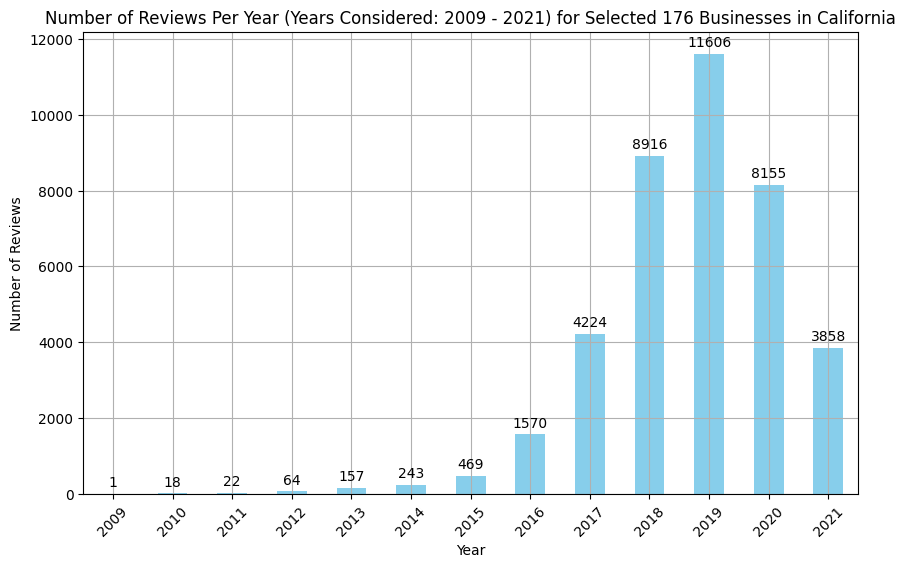

In [192]:
# Determine the range of years in the dataset
year_range = f"Years Considered: {df['review_year'].min()} - {df['review_year'].max()}"
print(year_range)

# 1. Review Trends Over Time
reviews_per_year = df['review_year'].value_counts().sort_index()
reviews_per_month = df['review_month'].value_counts().sort_index()

# Plot: Reviews Per Year
plt.figure(figsize=(10, 6))
bars = reviews_per_year.plot(kind='bar', color='skyblue')
plt.title(f'Number of Reviews Per Year ({year_range}) for Selected 176 Businesses in California')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

#### Now we perform the same for a month to see how the review counts have varried accross the months.

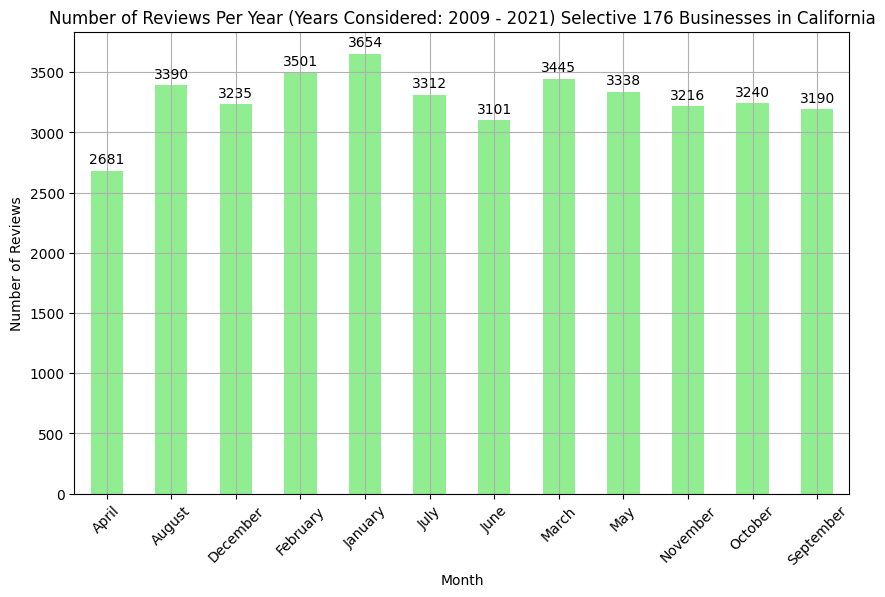

In [193]:
# Plot: Reviews Per Month
plt.figure(figsize=(10, 6))
bars = reviews_per_month.plot(kind='bar', color='lightgreen')
plt.title(f'Number of Reviews Per Year ({year_range}) Selective 176 Businesses in California')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

#### The below graph gives a great insight to business stake holders to know what is the common time where the users are dropping their reviews and this will help them to respond to those users quickly thus imporoving the response time.

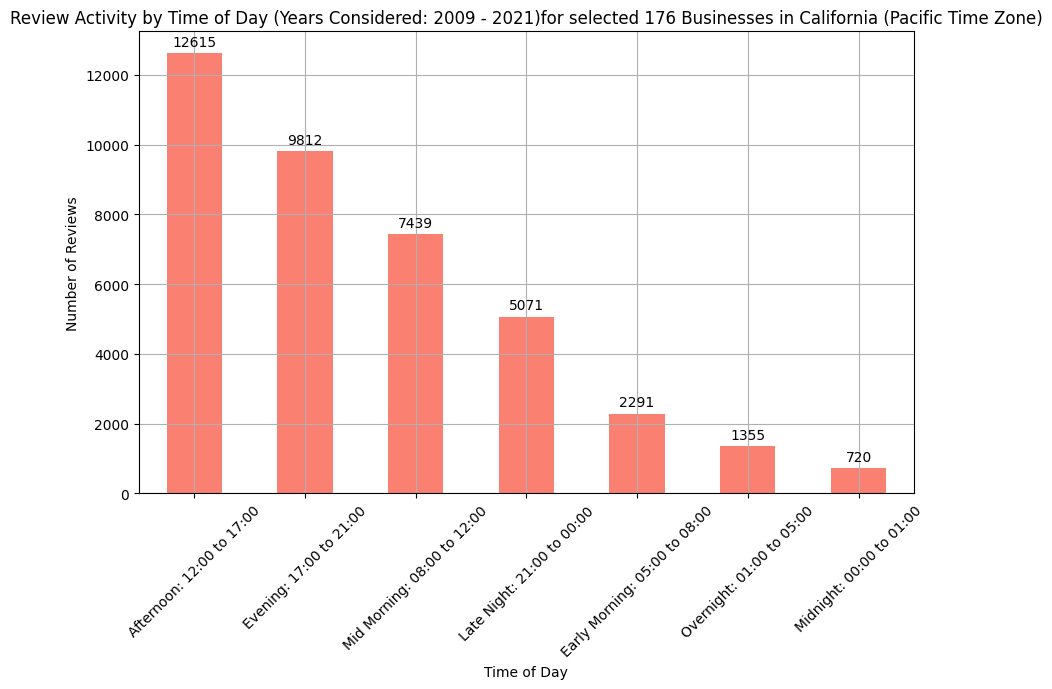

In [194]:
# 2. Review Activity by Time of Day
reviews_by_time_of_day = df['description_day'].value_counts()

# Plot: Reviews by Time of Day
plt.figure(figsize=(10, 6))
bars = reviews_by_time_of_day.plot(kind='bar', color='salmon')
plt.title(f'Review Activity by Time of Day ({year_range})for selected 176 Businesses in California (Pacific Time Zone)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

#### Below is the plot which explains on total number of ratings given for the review rating category that is 1 to 5

<ipython-input-195-921c3336e220>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].astype(int)


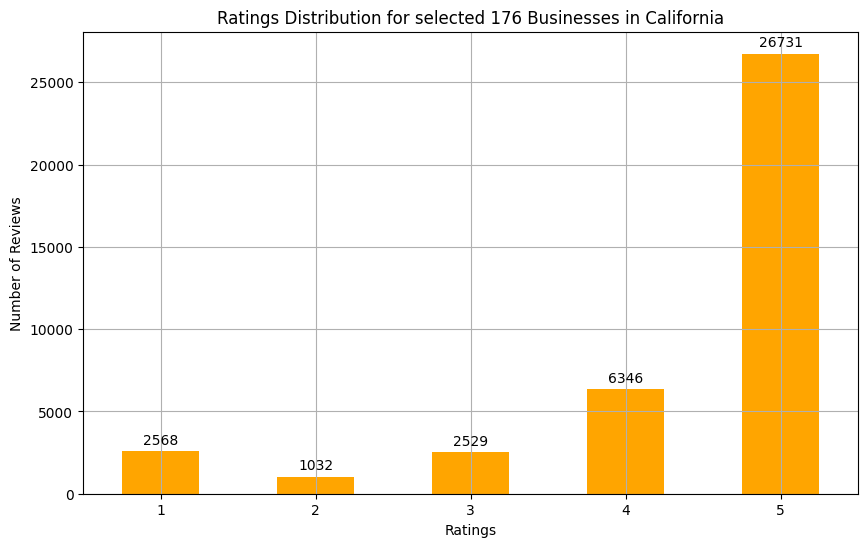

In [195]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

df = df.dropna(subset=['ratings'])

df['ratings'] = df['ratings'].astype(int)

ratings_distribution = df['ratings'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = ratings_distribution.plot(kind='bar', color='orange')
plt.title('Ratings Distribution for selected 176 Businesses in California')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(True)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

#### The Below plot gives the count on the number of photos posted users across years which is a greta insight, this pretty much follows the trend of the review count.

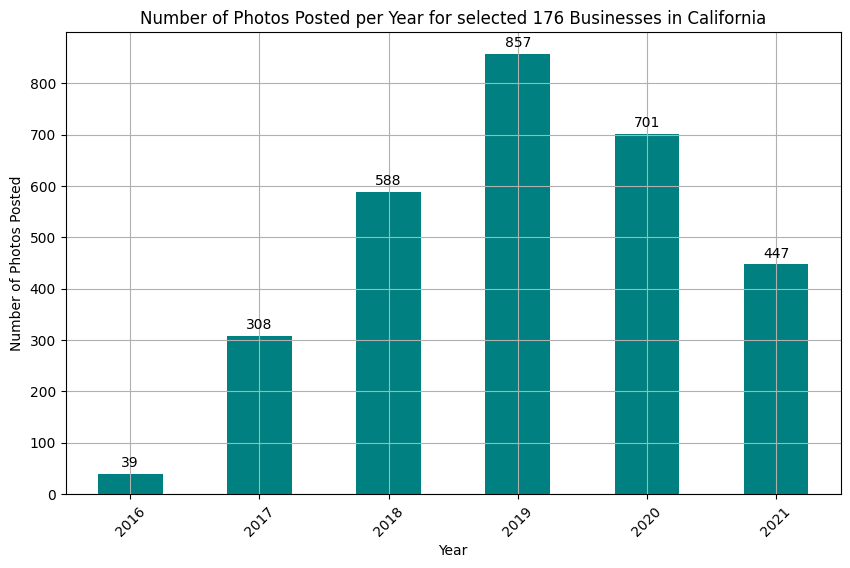

In [196]:
# 5. Photo Posting Activity
# Exclude rows where 'number_of_photos_posted' is 0
filtered_df = df[df['number_of_photos_posted'] > 0]

# Group by year and sum the number of photos posted
photos_per_year = filtered_df.groupby('review_year')['number_of_photos_posted'].sum()

# Plot: Number of Photos Posted per Year
plt.figure(figsize=(10, 6))
bars = photos_per_year.plot(kind='bar', color='teal')
plt.title('Number of Photos Posted per Year for selected 176 Businesses in California')
plt.xlabel('Year')
plt.ylabel('Number of Photos Posted')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()


<div class="alert alert-block alert-warning">
    
# Step 2 <a class="anchor" name="libs"></a>
 </div>

<div class="alert alert-block alert-warning">
    
##### Now jumping into Metadata which acts as support to pull out better insights when combined with our raw data which has been processed in the step 1 <a class="anchor" name="libs"></a>
 </div>


<div class="alert alert-block alert-warning">
    
## 2.1 Reading and Extracting The meta Data <a class="anchor" name="libs"></a>
 </div>

In [197]:
meta_data_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/meta-California.json.gz'

In [198]:
# Initialize an empty list to store each JSON object
data_list = []

# Open the gzipped JSON file and read it line by line
with gzip.open(meta_data_path, 'rt', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object and append it to the list
        data = json.loads(line.strip())
        data_list.append(data)


In [199]:
# Normalize the list of JSON objects to a flat table (DataFrame)
df_metadata = pd.json_normalize(data_list)

In [200]:
df_metadata.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,MISC.Dining options,MISC.Crowd,MISC.Planning,MISC.From the business,MISC.Recycling,MISC.Highlights,MISC.Getting here,MISC.Activities,MISC.Health and safety,MISC.Lodging options
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
    
## 2.2 Reviewing the resultant meta data as df to consider suitable support columns for EDA  <a class="anchor" name="libs"></a>
 </div>

In [201]:
# Remove the specified columns
columns_to_remove = ['address', 'MISC','relative_results','description','price','MISC','MISC.Service options','MISC.Accessibility', 'MISC.Payments','MISC.Health & safety']
df_metadata.drop(columns=columns_to_remove, inplace=True, errors='ignore')

In [202]:
df_metadata.columns

Index(['name', 'gmap_id', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'hours', 'state', 'url', 'MISC.Offerings',
       'MISC.Amenities', 'MISC.Atmosphere', 'MISC.Popular for',
       'MISC.Dining options', 'MISC.Crowd', 'MISC.Planning',
       'MISC.From the business', 'MISC.Recycling', 'MISC.Highlights',
       'MISC.Getting here', 'MISC.Activities', 'MISC.Health and safety',
       'MISC.Lodging options'],
      dtype='object')

In [203]:
# Rename the column 'gmap_id' to 'gmapid'
df_metadata.rename(columns={'gmap_id': 'gmapid'}, inplace=True)

#### 2.3 We will now try to understand the meta data columns,

In [204]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515961 entries, 0 to 515960
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    515951 non-null  object 
 1   gmapid                  515961 non-null  object 
 2   latitude                515961 non-null  float64
 3   longitude               515961 non-null  float64
 4   category                513585 non-null  object 
 5   avg_rating              515961 non-null  float64
 6   num_of_reviews          515961 non-null  int64  
 7   hours                   414982 non-null  object 
 8   state                   372248 non-null  object 
 9   url                     515961 non-null  object 
 10  MISC.Offerings          128171 non-null  object 
 11  MISC.Amenities          149017 non-null  object 
 12  MISC.Atmosphere         85719 non-null   object 
 13  MISC.Popular for        78440 non-null   object 
 14  MISC.Dining options 

In [205]:
df_metadata[['num_of_reviews','avg_rating']].describe()

,num_of_reviews,avg_rating
count,515961.000000,515961.000000
mean,136.696334,4.278333
std,375.423986,0.627410
min,1.000000,1.000000
25%,8.000000,4.000000
50%,33.000000,4.400000
75%,108.000000,4.700000
max,9998.000000,5.000000


In [206]:
df.columns

Index(['user_id', 'response', 'number_of_photos_posted', 'reviews', 'ratings',
       'time', 'gmapid', 'response_time', 'response_text', 'response_year',
       'response_month', 'response_day', 'response_time_only', 'review_year',
       'review_month', 'review_day', 'review_time_only', 'description_day'],
      dtype='object')

After reviewing the info and data types of the Meta data we can clearly see that majority of the data are categorical, average raitng and number reviews are float and int respectibely

Evaluate the usefulness of the metadata in conjunction with the main dataset.


In [207]:
# Perform an inner join on the 'gmapid' column
merged_df = pd.merge(df, df_metadata, on='gmapid', how='inner')

# Display the first few rows of the merged DataFrame to verify the result
merged_df.head()

,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,...,MISC.Dining options,MISC.Crowd,MISC.Planning,MISC.From the business,MISC.Recycling,MISC.Highlights,MISC.Getting here,MISC.Activities,MISC.Health and safety,MISC.Lodging options
0,111713347260096365103,None,0,Brother in law joe...,5,2017-05-10 17:05:19,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103991040530406884797,None,0,Best place to stop for gas it has the lowest p...,5,2017-06-11 12:44:53,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100956652924318492061,None,0,Cheapest place to get gas and very clean insid...,5,2017-07-21 11:35:15,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110231018317835831758,None,0,None,4,2017-08-03 22:15:18,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110157039523937502672,None,0,None,4,2017-08-20 19:14:27,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
merged_df.columns

Index(['user_id', 'response', 'number_of_photos_posted', 'reviews', 'ratings',
       'time', 'gmapid', 'response_time', 'response_text', 'response_year',
       'response_month', 'response_day', 'response_time_only', 'review_year',
       'review_month', 'review_day', 'review_time_only', 'description_day',
       'name', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'hours', 'state', 'url', 'MISC.Offerings',
       'MISC.Amenities', 'MISC.Atmosphere', 'MISC.Popular for',
       'MISC.Dining options', 'MISC.Crowd', 'MISC.Planning',
       'MISC.From the business', 'MISC.Recycling', 'MISC.Highlights',
       'MISC.Getting here', 'MISC.Activities', 'MISC.Health and safety',
       'MISC.Lodging options'],
      dtype='object')

#### 2.4 Data Transformation and pre-processing

In [209]:
# List of columns to keep
columns_to_keep = ['user_id', 'response', 'number_of_photos_posted', 'reviews', 'ratings',
                   'time', 'gmapid', 'response_time', 'response_text', 'response_year',
                   'response_month', 'response_day', 'response_time_only', 'review_year',
                   'review_month', 'review_day', 'review_time_only', 'description_day',
                   'name', 'latitude', 'longitude', 'category', 'avg_rating',
                   'num_of_reviews', 'hours', 'state', 'url']

# Select only the specified columns
merged_df = merged_df[columns_to_keep]

In [210]:
merged_df

,user_id,response,number_of_photos_posted,reviews,ratings,time,gmapid,response_time,response_text,response_year,...,description_day,name,latitude,longitude,category,avg_rating,num_of_reviews,hours,state,url
0,111713347260096365103,None,0,Brother in law joe...,5,2017-05-10 17:05:19,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,Evening: 17:00 to 21:00,Chimney Rock Travel Center,41.533240,-120.465735,[Gas station],4.6,107,"[[Friday, 6AM–10PM], [Saturday, 6AM–10PM], [Su...",Open ⋅ Closes 10PM,https://www.google.com/maps/place//data=!4m2!3...
1,103991040530406884797,None,0,Best place to stop for gas it has the lowest p...,5,2017-06-11 12:44:53,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,Afternoon: 12:00 to 17:00,Chimney Rock Travel Center,41.533240,-120.465735,[Gas station],4.6,107,"[[Friday, 6AM–10PM], [Saturday, 6AM–10PM], [Su...",Open ⋅ Closes 10PM,https://www.google.com/maps/place//data=!4m2!3...
2,100956652924318492061,None,0,Cheapest place to get gas and very clean insid...,5,2017-07-21 11:35:15,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,Mid Morning: 08:00 to 12:00,Chimney Rock Travel Center,41.533240,-120.465735,[Gas station],4.6,107,"[[Friday, 6AM–10PM], [Saturday, 6AM–10PM], [Su...",Open ⋅ Closes 10PM,https://www.google.com/maps/place//data=!4m2!3...
3,110231018317835831758,None,0,None,4,2017-08-03 22:15:18,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,Late Night: 21:00 to 00:00,Chimney Rock Travel Center,41.533240,-120.465735,[Gas station],4.6,107,"[[Friday, 6AM–10PM], [Saturday, 6AM–10PM], [Su...",Open ⋅ Closes 10PM,https://www.google.com/maps/place//data=!4m2!3...
4,110157039523937502672,None,0,None,4,2017-08-20 19:14:27,0x54cb9796e2112817:0x597cf5d29a1b0c62,None,None,None,...,Evening: 17:00 to 21:00,Chimney Rock Travel Center,41.533240,-120.465735,[Gas station],4.6,107,"[[Friday, 6AM–10PM], [Saturday, 6AM–10PM], [Su...",Open ⋅ Closes 10PM,https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39201,104992852213729433252,None,0,Good customer service,4,2020-03-13 15:53:28,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,...,Afternoon: 12:00 to 17:00,American Eagle & Aerie Store,37.784607,-122.406951,"[Clothing store, Lingerie store, Men's clothin...",4.2,128,None,None,https://www.google.com/maps/place//data=!4m2!3...
39202,114648899531474251683,None,0,None,5,2020-07-03 18:44:12,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,...,Evening: 17:00 to 21:00,American Eagle & Aerie Store,37.784607,-122.406951,"[Clothing store, Lingerie store, Men's clothin...",4.2,128,None,None,https://www.google.com/maps/place//data=!4m2!3...
39203,103882384136292601541,None,0,None,3,2020-07-14 12:41:11,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,...,Afternoon: 12:00 to 17:00,American Eagle & Aerie Store,37.784607,-122.406951,"[Clothing store, Lingerie store, Men's clothin...",4.2,128,None,None,https://www.google.com/maps/place//data=!4m2!3...
39204,103635121013456314533,None,0,Review of an online purchase:\n\nEditing to ad...,2,2020-09-29 13:11:51,0x89e6e6e0f23d5fcb:0x12029d0bebe5b964,None,None,None,...,Afternoon: 12:00 to 17:00,American Eagle & Aerie Store,37.784607,-122.406951,"[Clothing store, Lingerie store, Men's clothin...",4.2,128,None,None,https://www.google.com/maps/place//data=!4m2!3...


In [211]:
merged_df['category'].value_counts()

,count
category,
"[Grocery store, Supermarket]",3288
"[Japanese grocery store, Supermarket]",2255
[Appliance repair service],2127
"[Italian restaurant, Caterer, Family restaurant, Gluten-free restaurant, Takeout Restaurant, Seafood restaurant, Soup restaurant, Wine bar]",1896
[Bakery],1152
...,...
"[Medical spa, Laser hair removal service, Skin care clinic]",58
"[Hair salon, Beauty salon]",57
"[Coin operated laundry equipment supplier, Laundromat, Laundry, Laundry service]",56


In [212]:
merged_df['gmapid'].value_counts()

,count
gmapid,
0x809add6cec217ce7:0xd2c4a926a3f8f3ff,3288
0x80c2b56685ac2169:0xae5fe05abe26b2,2255
0x80ea4383b3b5f9a1:0x134212350afdd0ac,2127
0x808572d4362013df:0x41160b5efb0268e9,1896
0x80dcd7c31e793301:0x50dd0e8b33f0efbf,1117
...,...
0x80eaa58485538c21:0x38e0542d4d138714,56
0x80c3314952e15ae1:0x3e3ee91134b7f833,55
0x80db8aaf676aafbb:0x3f737b2bbc3d2254,55


In [213]:
unique_categories = set(item for sublist in merged_df['category'] for item in sublist)
print(unique_categories)

{'Northern Italian restaurant', 'Dessert shop', 'Laundry service', 'Skin care clinic', 'Caterer', 'Plant nursery', 'Truck stop', 'Sunglasses store', 'Print shop', 'Snack bar', 'Real estate rental agency', 'Cell phone store', 'Dog trainer', 'Appliance store', 'Telephone company', 'Tailor', 'Wedding venue', 'Plumber', 'Cake shop', 'Sporting goods store', 'Running store', 'Brake shop', 'Department store', 'Car dealer', 'Liquor store', 'Language school', 'Disc golf course', 'Musical instrument repair shop', 'Tax preparation service', 'Boat storage facility', 'Hardware store', 'Auto electrical service', 'Vegetarian restaurant', 'Variety store', 'Air conditioning repair service', 'Private educational institution', 'Appliance repair service', 'Tattoo shop', 'Oil change service', 'Property maintenance', 'Party store', 'Non-profit organization', 'Bubble tea store', 'Canoe & kayak store', 'Bookbinder', 'Cheese shop', 'Picnic ground', 'Tobacco shop', 'Community college', 'Packaging supply store',

In [214]:
# Function to safely convert strings to lists
def safe_literal_eval(x):
    if isinstance(x, str):  # Only attempt conversion if it's a string
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):  # Catch errors and return the original value
            return x
    return x  # If it's already a list, return it as is

# Apply the safe conversion function
merged_df['category'] = merged_df['category'].apply(safe_literal_eval)

# Define keyword-based broad categories
broad_categories = {
    'Travel & Hospitality': ['motel', 'hotel', 'mobile home', 'park', 'tourist', 'venue', 'golf', 'picnic', 'club', 'skydiving'],
    'Storage': ['self-storage', 'storage'],
    'Food & Beverage': ['restaurant', 'bar', 'cafe', 'coffee', 'bakery', 'juice', 'food', 'wine'],
    'Retail': ['store', 'shop', 'boutique', 'market', 'mall', 'grocer'],
    'Health & Wellness': ['clinic', 'dentist', 'dental','doctor', 'fitness', 'health', 'wellness', 'ortho'],
    'Education': ['school', 'university', 'college', 'educational', 'training'],
    'Automotive': ['car', 'auto', 'tire', 'repair', 'vehicle', 'mechanic', 'dealership'],
    'Real Estate': ['property', 'real estate', 'rental', 'management'],
    'Services': ['service', 'consultant', 'agency', 'office', 'repair', 'contractor'],
    'Salon': ['barber','spa','salon','hair'],
    'Church':['church'],
    'Other': ['event venue', 'dog park', 'historical landmark']
}

# Function to map detailed categories to broad categories using keyword matching
def map_to_broad_category(categories):
    # Flatten the list of categories into a single string for keyword matching
    category_str = ' '.join(categories).lower() if isinstance(categories, list) else str(categories).lower()

    # Iterate over broad categories and check for keyword matches
    for broad_category, keywords in broad_categories.items():
        if any(keyword in category_str for keyword in keywords):
            return broad_category

    return 'Other'  # Default category if no match is found

# Apply the mapping function to each row in the DataFrame
merged_df['broad_category'] = merged_df['category'].apply(map_to_broad_category)

# Display the updated DataFrame with broad categories
merged_df[['category', 'broad_category']]

,category,broad_category
0,[Gas station],Other
1,[Gas station],Other
2,[Gas station],Other
3,[Gas station],Other
4,[Gas station],Other
...,...,...
39201,"[Clothing store, Lingerie store, Men's clothin...",Retail
39202,"[Clothing store, Lingerie store, Men's clothin...",Retail
39203,"[Clothing store, Lingerie store, Men's clothin...",Retail
39204,"[Clothing store, Lingerie store, Men's clothin...",Retail


# Step 3

####Group by broad_category and for each business category count the occurence of ratings. We are performing this to understand what are the variations in the review count between highest reviews and lowest reviews for eaach of the business categories which will further help us to understand the business that are dropping in the wrong direction.

In [215]:
# Group the data by broad category and count the number of each rating (1 through 5)
ratings_count = merged_df.groupby('broad_category')['ratings'].value_counts().unstack().fillna(0)

# Calculate the total number of ratings for each category
ratings_count['total_ratings'] = ratings_count.sum(axis=1)

# Calculate the percentage of 4 and 5-star ratings
ratings_count['percentage_4_5'] = (ratings_count[4] + ratings_count[5]) / ratings_count['total_ratings'] * 100

# Calculate the percentage of 1 and 2-star ratings
ratings_count['percentage_1_2'] = (ratings_count[1] + ratings_count[2]) / ratings_count['total_ratings'] * 100

# Calculate the percentage of 3-star ratings
ratings_count['percentage_3'] = ratings_count[3] / ratings_count['total_ratings'] * 100

# Sort the index to ensure proper alignment on the x-axis
ratings_count = ratings_count.sort_index()


#### We plot the line graph which clear shows that for education and saloon category there is a drop in 4 to 5 star rating  and there is raise in 1 to 2 star rating, which leads to further exploration.

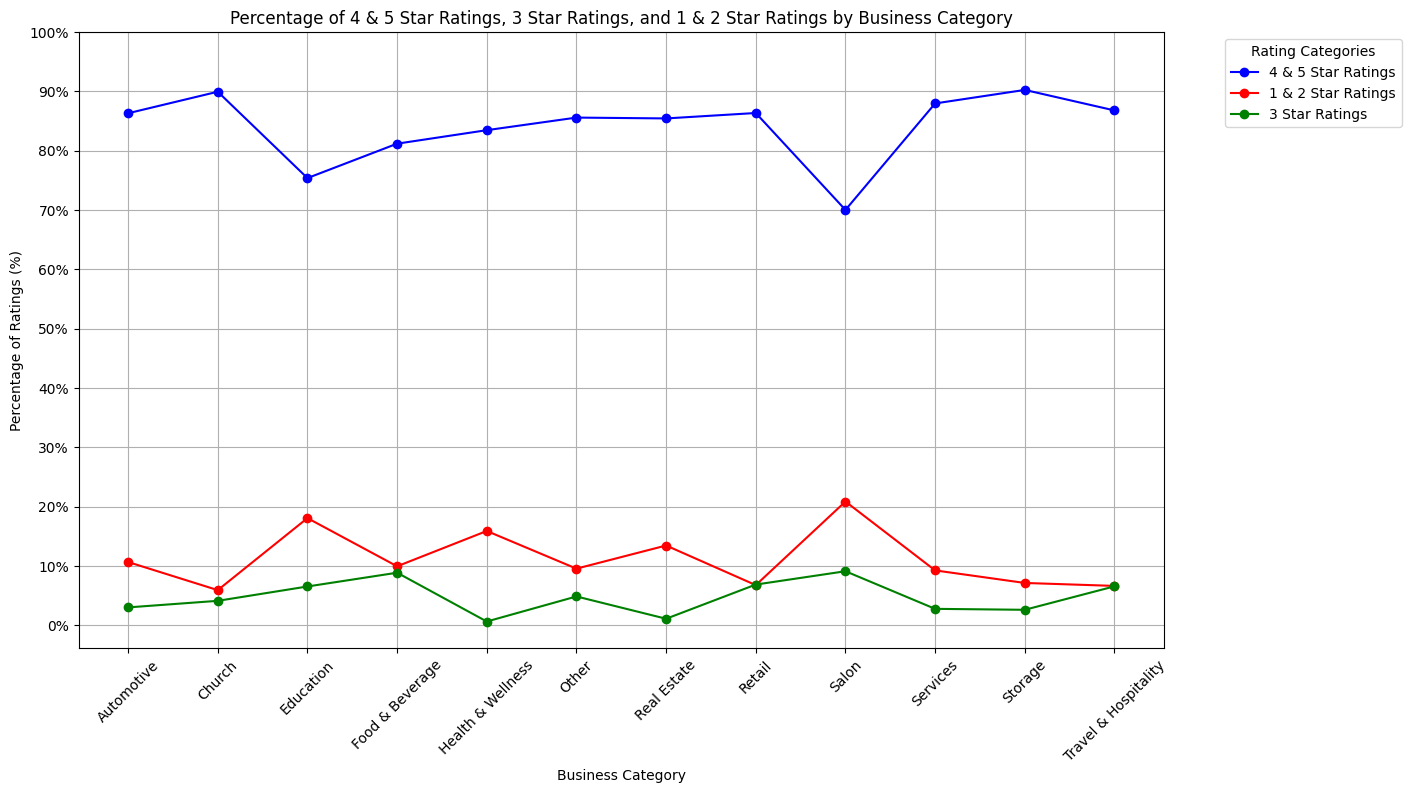

In [216]:
# Plot the percentages
plt.figure(figsize=(14, 8))

# Plot the line for 4 and 5-star ratings
plt.plot(ratings_count.index, ratings_count['percentage_4_5'], marker='o', color='blue', label='4 & 5 Star Ratings')

# Plot the line for 1 and 2-star ratings
plt.plot(ratings_count.index, ratings_count['percentage_1_2'], marker='o', color='red', label='1 & 2 Star Ratings')

# Plot the line for 3-star ratings
plt.plot(ratings_count.index, ratings_count['percentage_3'], marker='o', color='green', label='3 Star Ratings')

plt.title('Percentage of 4 & 5 Star Ratings, 3 Star Ratings, and 1 & 2 Star Ratings by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Percentage of Ratings (%)')
# Set y-ticks to 10, 20, 30, ..., 100
plt.yticks(ticks=range(0, 101, 10), labels=[f'{i}%' for i in range(0, 101, 10)])

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Rating Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight of the graph:

### Insight 3(Merged data): Analysing salon businesses

In [217]:
salons_df = merged_df[(merged_df['broad_category'] == 'Salon')]

In [218]:
# Classify ratings into 3 categories
def classify_rating(rating):
    if rating in [1, 2]:
        return '1-2'
    elif rating == 3:
        return '3'
    else:
        return '4-5'

salons_df['rating_category'] = salons_df['ratings'].apply(classify_rating)

<ipython-input-218-f30ffb66ba81>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salons_df['rating_category'] = salons_df['ratings'].apply(classify_rating)


#### We again cross verify on how the 4 to 5 star ratings are reducing gradually for the saloon and post 2019 we can see that 1 to 2 star ratings have shot up when compared to previous years.

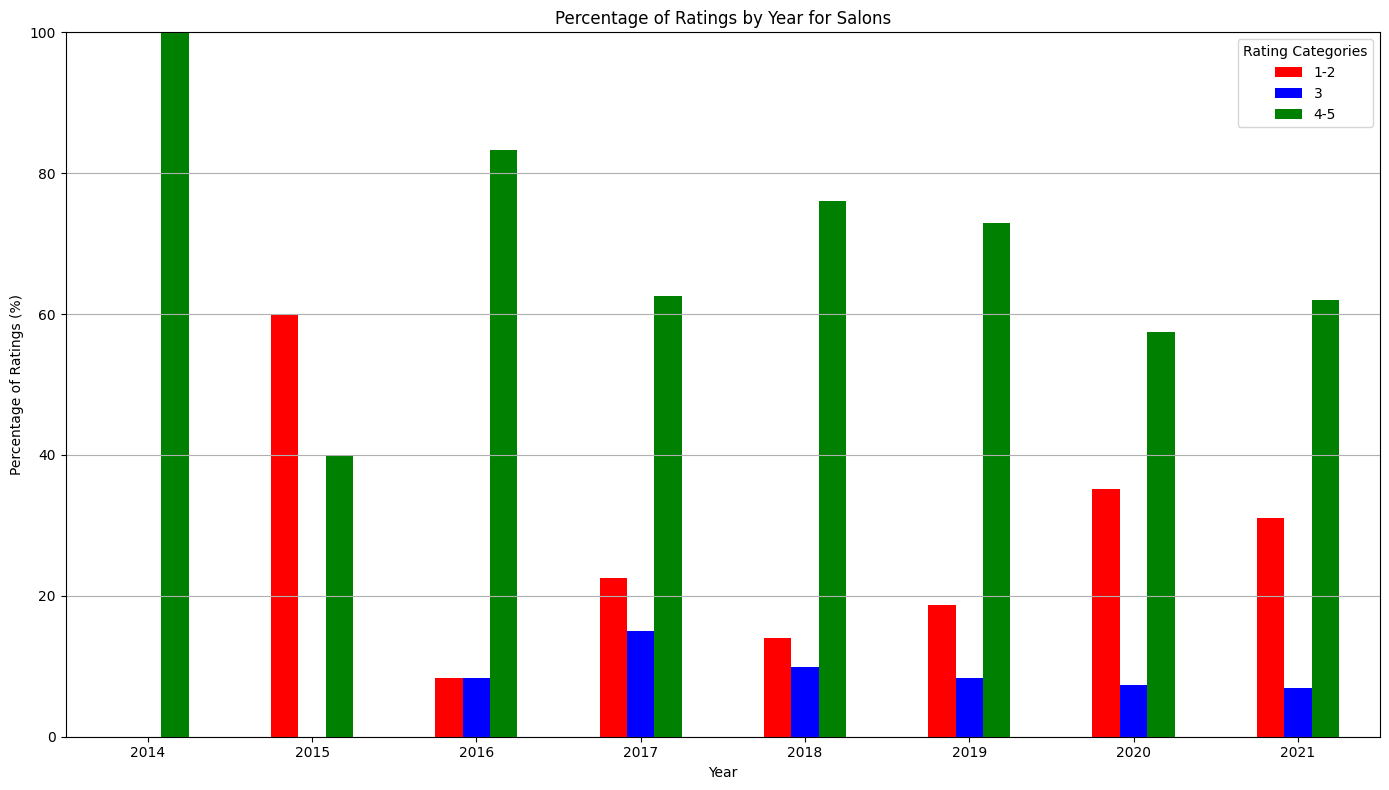

In [219]:
# Group by year and rating category, then calculate the percentages
rating_counts = salons_df.groupby(['review_year', 'rating_category']).size().unstack(fill_value=0)

# Calculate the percentage for each category within each year
rating_percentages = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the clustered bar chart
rating_percentages.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'])

# Customize the plot
plt.title('Percentage of Ratings by Year for Salons')
plt.xlabel('Year')
plt.ylabel('Percentage of Ratings (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Rating Categories')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Insight:

#### Further analysis of salon businesses

#### We perform NLP to further see what are the frequent occuring words in these negative reviews. We first tokenized the words and then removed the stop words further creating unigram and bi-grams for the critic reviews.

In [220]:
# Filter the DataFrame for Salon reviews with ratings between 1 and 3
salon_reviews = merged_df[(merged_df['broad_category'] == 'Salon') & (merged_df['ratings'].isin([1, 2, 3]))]

# Extract the review text
salon_review_texts = salon_reviews['reviews'].dropna().tolist()
salon_review_texts = [review for review in salon_review_texts if review.lower() != 'none']

In [221]:
# Ensure that NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Set of stop words
stop_words = set(stopwords.words('english'))

def clean_review_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize and remove stop words and short tokens
    tokens = [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and len(word) > 2]

    # Create unigrams and bigrams
    unigrams = tokens
    bigrams = ['_'.join(gram) for gram in ngrams(tokens, 2)]

    return unigrams + bigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
# Apply the cleaning function to each review
cleaned_reviews = []
for review in salon_review_texts:
    cleaned_reviews.extend(clean_review_text(review))

# Count the frequency of words and phrases
word_freq = Counter(cleaned_reviews)

#### For the performed NLP we plotted the world cloud and we can see that the most highlited words are nail's, didn't, never, massage and so on, since these are world cloud taken from the negative reviews the busines need to focus on giving better customer serive by training their team at the salon.

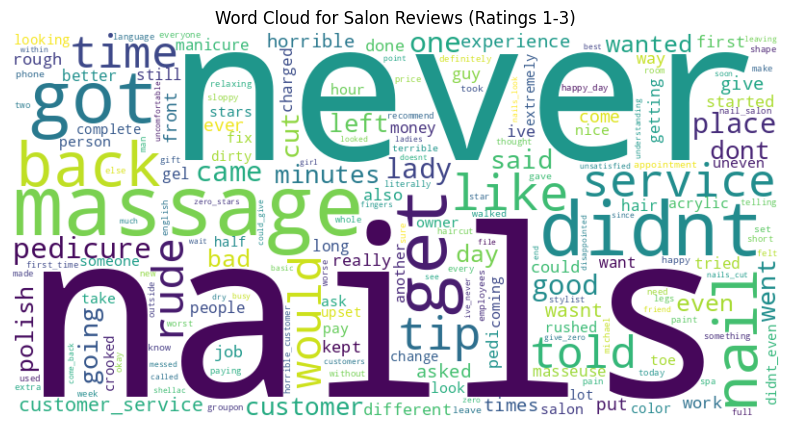

In [223]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Salon Reviews (Ratings 1-3)')
plt.show()

### Analysing Education Businesses

#### We have performed same set of tasks just like we did for Salon df

In [224]:

education_df = merged_df[(merged_df['broad_category'] == 'Education')]

In [225]:
# Step 1: Classify ratings into 3 categories
def classify_rating(rating):
    if rating in [1, 2]:
        return '1-2'
    elif rating == 3:
        return '3'
    else:
        return '4-5'


education_df['rating_category'] = education_df['ratings'].apply(classify_rating)


<ipython-input-225-c3857981c963>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['rating_category'] = education_df['ratings'].apply(classify_rating)


In [226]:
# Step 2: Group by year and rating category, then calculate the percentages
rating_counts = education_df.groupby(['review_year', 'rating_category']).size().unstack(fill_value=0)

Created a clustered bar graph

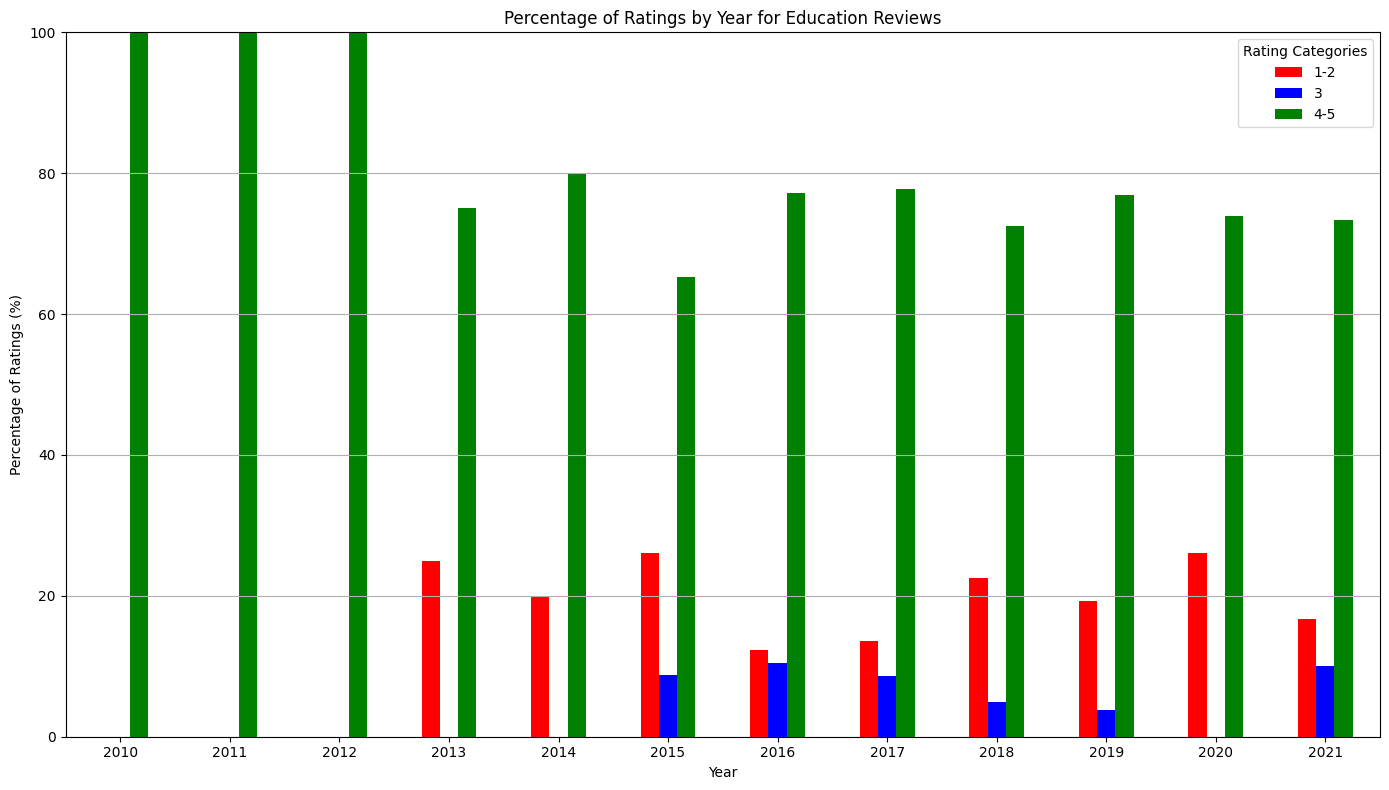

In [227]:
# Calculate the percentage for each category within each year
rating_percentages = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100


# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(14, 8))


# Plot the clustered bar chart
rating_percentages.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'])


# Customize the plot
plt.title('Percentage of Ratings by Year for Education Reviews')
plt.xlabel('Year')
plt.ylabel('Percentage of Ratings (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Rating Categories')
plt.grid(True, axis='y')


# Show the plot
plt.tight_layout()
plt.show()

#### We perform NLP to further see what are the frequent occuring words in these negative reviews. We first tokenized the words and then removed the stop words further creating unigram and bi-grams for the critic reviews.

In [228]:
# Filter the DataFrame for Salon reviews with ratings between 1 and 3
education_reviews = merged_df[(merged_df['broad_category'] == 'Education') & (merged_df['ratings'].isin([1, 2, 3]))]

# Extract the review text
education_review_texts = education_reviews['reviews'].dropna().tolist()
education_review_texts = [review for review in education_review_texts if review.lower() != 'none']


In [229]:
education_reviews['gmapid'].value_counts()

,count
gmapid,
0x80deaade255cf767:0x7976e0f2cd3fe1a,38
0x80c2cb56cd705333:0xe924d87f84653408,24
0x80c2cd60edef1f4d:0x9430f83e2fd7b8bf,17


In [230]:
# Apply the cleaning function to each review
cleaned_reviews_education = []
for review in education_review_texts:
    cleaned_reviews_education.extend(clean_review_text(review))

# Count the frequency of words and phrases
word_freq_education = Counter(cleaned_reviews_education)


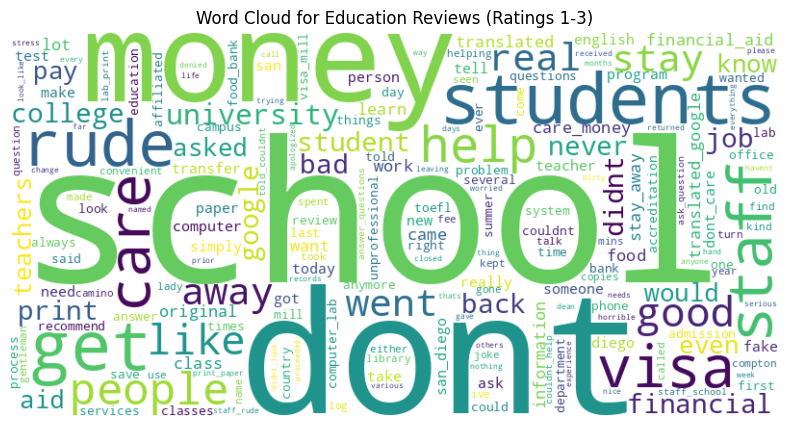

In [231]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_education)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Education Reviews (Ratings 1-3)')
plt.show()


#### From the cloud of words we convey that there some negative reviews which consists of money, school, staff. Also word 'rude' states some staff members might not be friendly or co-operative with the students. This completely resembles the dissatisfaction of the students. Also word 'visa' points towards some negative feedbacks from international students. So, these businesses can work on particular area to make their businesses profitable.

## References



*   [1] https://www.geeksforgeeks.org/generating-word-cloud-python/




[Link to my workspace](https://colab.research.google.com/drive/10zmLc_hFcWCW7l3-7icCa1jz7Dc6vH3W?usp=sharing)